In [2]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt


(-0.5826681281637294,
 1.6054769773156548,
 -0.5569335657708218,
 1.6471189607089687)

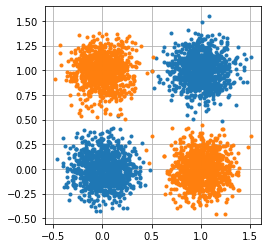

In [3]:
#data creation
s=0.15
x00=rd.randn(2,1000)*s
x10=rd.randn(2,1000)*s
x10[0,:]=x10[0,:]+1
x01=rd.randn(2,1000)*s
x01[1,:]=x01[1,:]+1
x11=rd.randn(2,1000)*s+1

x0=np.hstack((x00,x11))
x1=np.hstack((x10,x01))

plt.plot(x0[0,:],x0[1,:],'.')
plt.plot(x1[0,:],x1[1,:],'.')
plt.grid(True)
plt.axis('scaled')

In [4]:
X=np.hstack((x0,x1))
print(X.shape)
y=np.hstack((np.zeros(2000),np.ones(2000)))*2-1
#shuffle data
idx=rd.permutation(X.shape[1])
X=X[:,idx]
y=y[idx]

(2, 4000)


#### 3-layer MLP network with H hidden units

In [5]:
H=10
Wi=rd.randn(2,H)*.1
b=np.zeros((H,1))
Wo=rd.randn(H,1)*.1
bo=0

dzWi=np.zeros(Wi.shape)
dzb=np.zeros(b.shape)
dzWo=np.zeros(Wo.shape)
dzbo=0

alpha=0.9
iter=1500
eta=1e-5

Error=np.zeros(iter)

for n in range(iter):
    #forward pass
    u=np.dot(Wi.T,X)+b
    v=np.tanh(u)
    z=np.dot(Wo.T,v)+bo
    yh=np.tanh(z)
    
    #error 
    E=y-yh
    Error[n]=np.mean(E**2)
    
    #gradient
    dz=-2*E*(1-yh**2)
    dbo=np.sum(dz)
    dWo=np.dot(v,dz.T)
    du=(1-v**2)*np.dot(Wo,dz)
    db=np.sum(du,axis=1)
    dWi=np.dot(X,du.T)
    
    #adapt
    dzWi=alpha*dzWi+dWi
    dzb=alpha*dzb+db[:,np.newaxis]
    dzWo=alpha*dzWo+dWo
    dzbo=alpha*dzbo+dbo
    
    Wi=Wi-eta*dzWi
    b=b-eta*dzb
    Wo=Wo-eta*dzWo
    bo=bo-eta*dzbo
    

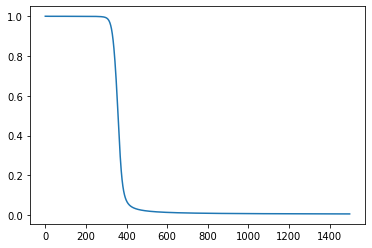

In [6]:
plt.plot(Error)

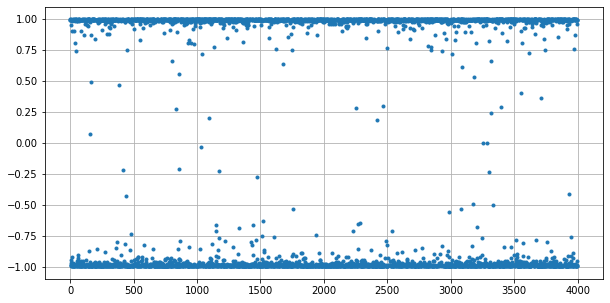

In [7]:
plt.figure(figsize=(10,5))
plt.plot(yh.squeeze(),'.')
plt.grid(True)

Nº de erros: 6


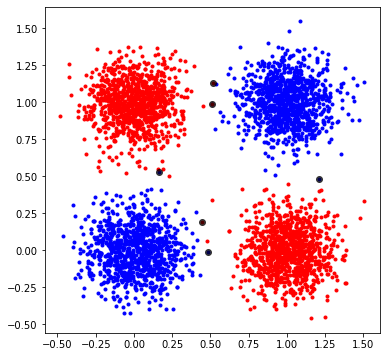

In [8]:
plt.figure(figsize=(6,6))
ye=(yh.squeeze()>=0)*2-1
plt.plot(X[0,y==-1],X[1,y==-1],'.b')
plt.plot(X[0,y==1],X[1,y==1],'.r')
plt.plot(X[0,y!=ye],X[1,y!=ye],'ok',alpha=.7)
print('Nº de erros:',np.sum(y!=ye))


#### Visualizing the network transfer funciton

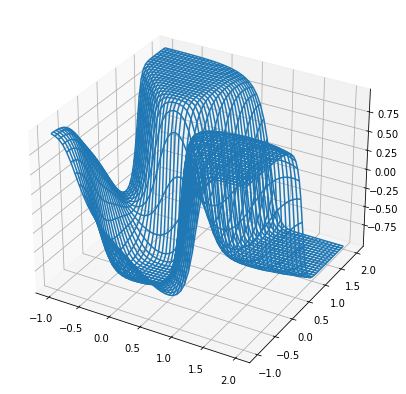

In [9]:
gX,gY=np.meshgrid(np.linspace(-1,2,50),np.linspace(-1,2,50))
X2=np.vstack((gX.ravel(),gY.ravel()))
u=np.dot(Wi.T,X2)+b
v=np.tanh(u)
z=np.dot(Wo.T,v)
yh=np.tanh(z+bo)
Yh=np.reshape(yh,(50,50))

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
#ax.contour3D(gX,gY,Yh,50,cmap='binary')
ax.plot_wireframe(gX,gY,Yh)